#AI&R A1 : 8-puzzle problem
---
Solve 8-puzzle problem using A* algorithm. Assume any initial configuration and define goal configuration clearly.

##Mathematical Model

> S = {s; e; X; Y; Fme; Ff; DD; NDD}

s = start state
*   {{1,2,3},{0,4,6},{7,5,8}}

e = end state
*   {{1,2,3},{4,5,6},{7,8,0}}

X = {X1}
*   X1 = s

Y = {Y1}
*   Y1 = e

Fme = {f0}
*   f0 = function to perform A* searching

Ff = {f1,f2,f3,f4,f5}
where
*   f1 = function to find cost
*   f2 = function to find states
*   f3 = function to display grid
*   f4 = function to generate next possible set of moves
*   f4 = function to validate moves

DD = 3x3 Grid of puzzle

NDD = No non deterministic data

##Theory


###8-puzzle Problem
*   8 puzzle is a popular puzzle that consists of 8 tiles and one empty space.
*   The puzzle is divided into 3 rows and 3 columns.
*   The other 8 tiles have numbers 1 through 8 on it
*   The puzzle can be solved by moving the tiles one by one in the single empty space and thus achieving the Goal State.
*   Start and Goal states of the puzzle are provided below.

###Start State (Example)

> {{1,2,3},{0,4,6},{7,5,8}}

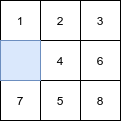

###Perception
*   We visualize swapping the empty space with it's neighbours
*   The empty tile can have 9 possible locations.
∃x.(move(x) ∧ valid location(x))
*   The empty space can only move in four directions (Movement of empty space) ∀x.(shuffle(x) ∧ valid(x) → open list(x))
 *   Up 
 *   Down 
 *   Right
 *   Left
*   The empty space cannot move diagonally and can take only one step at a time.
*   ∃x.(move(x) → ~diagonal(x))

###Cognition

>f(n) = g(n) + h(n)

*  Cost of A* Algorithm : f(n) = g(n) + h(n)
 *  g(n) is the cost of the path traversed from the initial state to node n.
 *  h(n) is the estimated path-cost or the heuristic function cost from node n to the goal node.

####In 8-puzzle problem

*  g(n) = Path Cost
 *  Each step costs 1, so the path cost is the number of steps in the path.

*  For any 8-puzzle's tile
 *  Misplaced(i) = { ((x1ᵢ=x2ᵢ) & (y1ᵢ=y2ᵢ)) ∀ x1ᵢ,y1ᵢ,x2ᵢ,y2ᵢ ∈ {0,1,2} }
 *  Where,
 *  ( x1ᵢ, y1ᵢ ) is the coordinate of the tile with number i in current state
 *  ( x2ᵢ, y2ᵢ ) is the coordinate of the tile with number i in goal state
 *  x1ᵢ,y1ᵢ,x2ᵢ,y2ᵢ ∈ {0,1,2}
 *  i ∈ {0,1,2,3,4,5,6,7,8}
 *  h(n) = Misplaced(i) for 0<=i<=8

###Action

> Action = {U, L, D, R}

*  Action can represented as a set of 4
*  Each Action represents interchanging of blank tile with the neighbour in one of the 4 directions.
  1.   Up (U)
  2.   Down (D)
  3.   Right (R)
  4.   Left (L)
*   Constraints
 *   The neighbour should not be diagonally adjacent
 *   The edge positions can interchange in only three directions
 *   The corner positions can interchange in only two directions
 *   Interchanging takes place one step at a time

> fmin = min(f1,f2,...,fm)

*  Choose the heuristic function with the minimum f-value

Where m is the number of states



###Goal State
> {{1,2,3},{4,5,6},{7,8,0}}

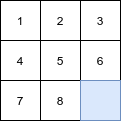





###Knowledge Base

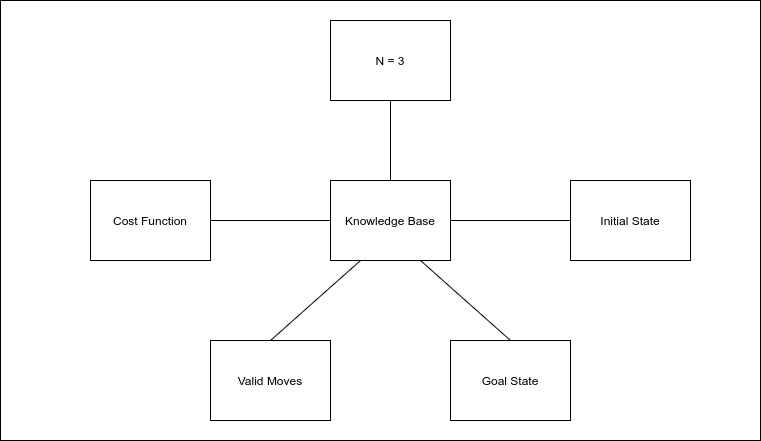

##Source Code

In [61]:
class Node:
    '''A node for A* path finding'''
    def __init__(self, data, level, fval):
        '''Initialize the node with the data, the level of the node and the calculated fvalue'''
        self.data = data
        self.level = level
        self.fval = fval
    
    def generate_openList(self):
        '''Generate child nodes from the given node by moving the blank space either (up, down, left, right)'''
        x, y = self.find(self.data, '_')#in the input data, if blank space is found, it's coordinates are stored in x and y respectively
        '''val_list contains the position values for moving the blank space up,down,left,right resp'''
        
        '''PERCEPTION'''
        val_list = [[x,y-1], [x, y+1], [x-1, y], [x+1, y]]
        openList = []
        for i in val_list:                                    #provided the coordinates in val_list are not none,
            child = self.shuffle(self.data, x, y, i[0], i[1]) #exchange the blank space with the value in the provided coordinates
            #print(child)
            if child is not None:
                child_node = Node(child,self.level + 1, 0)    #child_node is the value that will be printed as the next matrix
                openList.append(child_node)
        return openList
    
    def shuffle(self, puz, x1, y1, x2, y2):
        '''Moves the blank space in the given direction and if the position value is out of limits return None'''
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz) #creates a new matrix that is the updated matrix
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None
        
    def copy(self, root):
        '''Copy the function to create a similar matrix of the given node'''
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp
        
    def find(self, puz, x):
        '''Used to find the position of the blank space'''
        for i in range(len(self.data)):
            for j in range(len(self.data)):
                if puz[i][j] == x:
                    return i,j
                
class Puzzle:
    def __init__(self,size):    
        '''Initialize the size of the puzzle by the specified size, open and closed lists are empty'''
        self.n = size
        self.open = []
        self.closed = []
        
    def accept(self):
        '''Accepts input from the user and stores in puz list'''
        puz = []
        for i in range(self.n):
            temp = input().split()
            puz.append(temp)
        return puz
    
    '''COGNITION'''
    def f(self, state, goal):
        '''Heuristic Function to calculate heuristic value f(x) = h(x) + g(x)'''
        var = self.h(state.data, goal) + state.level
        return self.h(state.data, goal) + state.level
    
    def h(self, state, goal):
        '''Calculates the difference between the given puzzles'''
        temp = 0
        for i in range(self.n):
            for j in range(self.n):
                if state[i][j] != goal[i][j] and state[i][j] != '_':
                    temp += 1
        return temp
    
    def process(self):
        print('Enter the initial State\n')
        start = self.accept() #input is taken from the user
        print('\n\nEnter the Goal State\n')
        goal = self.accept() #input is taken from the user

        if(start==goal):
          print("Initial State and Goal State are the Same, Exiting the program...")
          return

        start = Node(start, 0, 0) #input, 0, 0
        start.fval = self.f(start, goal)
        self.open.append(start)
        print('\n\nStates:-')
        while True:
            cur = self.open[0]
            print("\n")
            for i in cur.data:
                for j in i:
                    print(j, end = " ")
                print()
            '''If the difference between current and goal node is 0 we have reached the goal node'''
            
            '''GOAL'''
            if(cur.level > 1000):
                printf("Unsolvable")
                break
                
            if(self.h(cur.data, goal) == 0):
                break
            for i in cur.generate_openList():
                i.fval = self.f(i, goal)
                self.open.append(i)
            
            '''ACTION'''
            self.closed.append(cur)
            del self.open[0]
            '''sort the open list according to f value'''
            self.open.sort(key = lambda x:x.fval, reverse = False)

puz = Puzzle(3)
puz.process()

Enter the initial State

1 2 3
4 5 6
7 8 _


Enter the Goal State

1 2 3
4 5 6
7 8 _
Initial State and Goal State are the Same, Exiting the program...


In [ ]:
#Original Output for initial state specified above
puz = Puzzle(3)
puz.process()

Enter the initial State

1 2 3
_ 4 6
7 5 8


Enter the Goal State

1 2 3
4 5 6
7 8 _


States:-


1 2 3 
_ 4 6 
7 5 8 


1 2 3 
4 _ 6 
7 5 8 


1 2 3 
4 5 6 
7 _ 8 


1 2 3 
4 5 6 
7 8 _ 


In [ ]:
#Modification - Start State and Goal State are same
puz = Puzzle(3)
puz.process()

Enter the initial State

1 2 3
4 5 6
7 8 _


Enter the Goal State

1 2 3
4 5 6
7 8 _
Initial State and Goal State are the Same, Exiting the program...
